
### Supervised Learning
### Activity: Building a Student Intervention System

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail or pass. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: ** 

<b>The goal for this project is to determine whether the student pass or fail. This is clearly a <u>binary classification problem</u>.<br> 

### Question-2
load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read student data
df1=pd.read_csv("student-data.csv")

In [3]:
df1.shape

(395, 31)

##### There are 395 rows and 31 columns in the dataset.

In [4]:
## gender distribution 
df1['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [5]:
## to set the size of plt parameters
plt.rcParams['font.size'] = 11

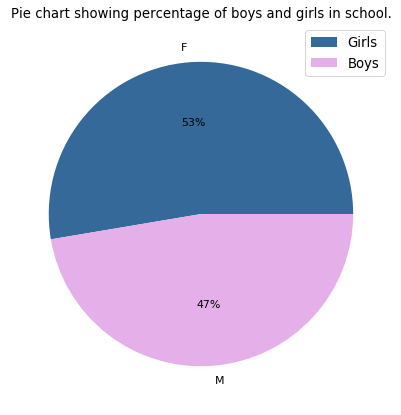

In [6]:
plt.figure(figsize=(7,7))
plt.title("Pie chart showing percentage of boys and girls in school.")
colors = ['#34699A','#E5B0EA']
plt.pie(df1['sex'].value_counts(), labels = df1['sex'].unique(), colors = colors, autopct='%.0f%%')
plt.legend(['Girls','Boys'],loc="upper right",fontsize='large')
plt.show()

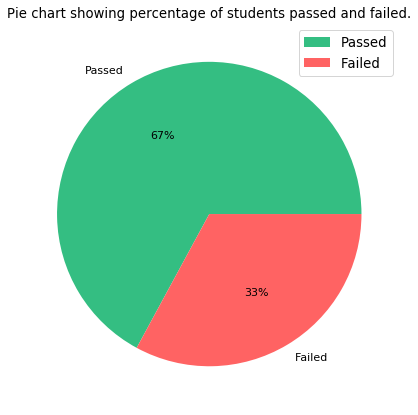

In [7]:
## Total students pass and failed
plt.figure(figsize=(7,7))
plt.title("Pie chart showing percentage of students passed and failed.")
colors = ['#34BE82','#FF6363']
plt.pie(df1['passed'].value_counts(), labels = ['Passed','Failed'], colors = colors, autopct='%.0f%%')
plt.legend(['Passed','Failed'],loc="upper right",fontsize='large')
plt.show()

C:\Users\MyPc\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


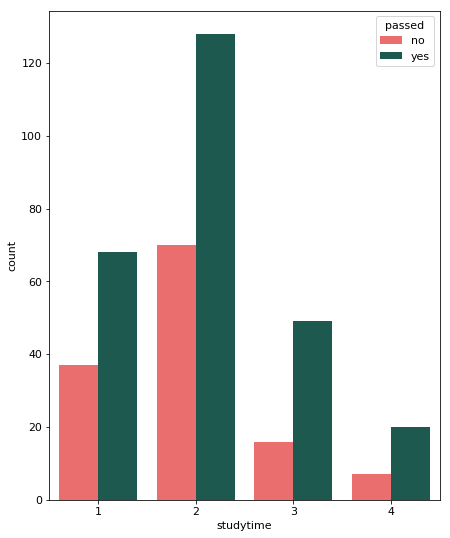

In [8]:
## Study time vs Passed/failed
plt.figure(figsize=(7,9))
sns.countplot(df1['studytime'],hue=df1['passed'],palette=['#FF5959','#146356'])

Majority of the students who passed the test had two hours of study time.

In [9]:
## Checking for NULL values
df1.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

##### No NULL values in the dataset

### Question-3
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [10]:
# Calculate number of students
n_students=len(df1)

In [11]:
# Calculate number of features
n_features=df1.shape[1]

In [12]:
# Calculate passing students
n_passed=df1['passed'][df1['passed']=='yes'].count()

In [13]:
# Calculate failing students
n_failed=df1['passed'][df1['passed']=='no'].count()

In [14]:
# Calculate graduation rate
grad_rate=round((n_passed/n_students)*100,2)

In [15]:
# Print the results
print("Total number of students are : ",n_students)
print("Total number of features for each student : ",n_features)
print("The number of those students who passed : ",n_passed)
print("The number of those students who passed : ",n_failed)
print("The graduation rate is : ",grad_rate,"%")

Total number of students are :  395
Total number of features for each student :  31
The number of those students who passed :  265
The number of those students who passed :  130
The graduation rate is :  67.09 %


## Preparing the Data
you will prepare the data for modeling, training and testing.

### Question-4 Identify feature and target columns


separate the student data into feature and target columns to see if any features are non-numeric.

In [16]:
# Extract feature columns

In [17]:
## feature columns
df1.drop('passed',axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

##### 18 (including target column) non numeric columns and 13 numeric columns are there.

In [18]:
# Extract target column 'passed'

In [19]:
df1['passed'].value_counts()

yes    265
no     130
Name: passed, dtype: int64

In [20]:
# Separate the data into feature data and target data (X and y, respectively)

In [21]:
X=df1.drop('passed',axis=1)
y=df1['passed']

### Question-5 Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [22]:
X=pd.get_dummies(X)

In [23]:
pd.set_option('display.max_columns', None)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


### Question - 6 Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. you will need to implement the following:
- Randomly shuffle and split the data (`X`, `y`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [24]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.24)

In [25]:
# Show the results of the split
X_train.shape

(300, 56)

In [26]:
X_test.shape

(95, 56)

### Question - 7  Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data and measure the accuracy score.

###  Model Application
*List three supervised learning models that are appropriate for this problem. What are the general applications of each model? What are their strengths and weaknesses? Given what you know about the data, why did you choose these models to be applied?*

In [27]:
#explaination

<b>This is a binary classification problem. The target variable has to be either 'yes' or 'no'.</b><br>
<b>So SVM, KNN, Logistic Regression algorithms can be used.</b>
<br>
<h6><u>SVM</u></h6>
<br>
<u>Applications</u> : <br>
<ol>
    <li>Face detection</li>
    <li>Text and hypertext categorization</li>
    <li>Classification of images</li>
    <li>Handwriting recognition</li>
    <li>Protein classification and Cancer classification</li>
</ol>
<br>
<u>Strength</u> : <br>
<ul>
    <li>It can provide high accuracy with less computation power.</li>
    <li>Not sensitive to overfitting.</li>
</ul><br>
<u>Weakness</u> : <br>
<ul>
    <li>Not the best choice for large number of features.</li>
</ul>
<br>
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<h6><u>KNN</u></h6>
<br>
<u>Applications</u> : <br>
<ol>
    <li>Used for Recommendation Systems.</li>
    <li>KNN can search for semantically similar documents.</li>
    <li>Credit Card fraud detection.</li>
    <li>Used to detect spam emails</li>
</ol>
<br>
<u>Strength</u> : <br>
<ul>
    <li>Simple to understand, fast and efficient.</li>
</ul><br>
<u>Weakness</u> : <br>
<ul>
    <li>Need to manually choose the best 'k' value.</li>
</ul>
<br>
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<h6><u>Logistic Regression</u></h6>
<br>
<u>Applications</u> : <br>
<ol>
    <li>Also used for credit Card Fraud</li>
    <li>Logistic regression is a popular choice in many natural language processing tasks.</li>
    <li>Also used for Used to detect spam emails</li>
</ol>
<br>
<u>Strength</u> : <br>
<ul>
    <li>Probabilistic Approach.</li>
</ul><br>
<u>Weakness</u> : <br>
<ul>
    <li>Assumptions like the target is binary,the sample size is sufficiently large, no extreme outliers etc</li>
</ul>
<br>
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [28]:
# Import the three supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [29]:
# fit model-1  on traning data 
temp=[]

In [30]:
## linear SVM
model1=SVC(kernel='linear')
model1.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
# predict on the test data 

In [32]:
y_pred=model1.predict(X_test)

In [33]:
# calculate the accuracy score

In [34]:
from sklearn.metrics import accuracy_score
print("Accuracy score of model1(SVM) : ",accuracy_score(y_test,y_pred))

Accuracy score of model1(SVM) :  0.6947368421052632


In [35]:
temp.append(['Linear SVM',round(accuracy_score(y_test,y_pred),5)])

In [36]:
## poly SVM
svm_linear=SVC(kernel='poly',degree=2)
svm_linear.fit(X_train,y_train)
y_pred=svm_linear.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [37]:
accuracy_score(y_test,y_pred)

0.6842105263157895

In [38]:
temp.append(['Poly SVM',round(accuracy_score(y_test,y_pred),5)])

In [39]:
## radial SVM
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [40]:
accuracy_score(y_test,y_pred)

0.6526315789473685

In [41]:
temp.append(['Radial SVM',round(accuracy_score(y_test,y_pred),5)])

In [42]:
# fit the model-2 on traning data and predict on the test data and measure the accuracy

Text(0, 0.5, 'accuracy')

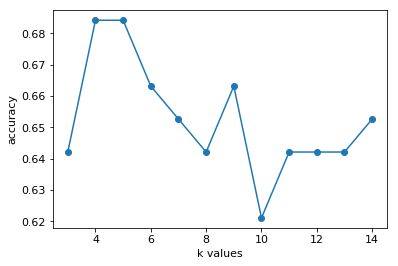

In [43]:
model2=KNeighborsClassifier()
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)
plt.plot(neighbors,acc_val,'o-')
plt.xlabel('k values')
plt.ylabel("accuracy")

In [44]:
## k = 4
model2=KNeighborsClassifier(n_neighbors=4,metric='minkowski')
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
print("Accuracy score of model2(KNN) : ",accuracy_score(y_test,y_pred))

Accuracy score of model2(KNN) :  0.6842105263157895


In [45]:
temp.append(['KNN',round(accuracy_score(y_test,y_pred),5)])

In [46]:
# fit the model-3 on traning data and predict on the test data and measure the accuracy

In [47]:
model3=LogisticRegression()
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
print("Accuracy score of model3(Logistic Regression) : ",accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy score of model3(Logistic Regression) :  0.7157894736842105


In [48]:
temp.append(['Logistic Regression',round(accuracy_score(y_test,y_pred),5)])

In [49]:
## converting all Accuracy score to a dataframe
df2 = pd.DataFrame(temp, columns = ['Algorithms', 'Accuracy_score'])

In [50]:
df2.sort_values(by=['Accuracy_score'],ascending=False)

,Algorithms,Accuracy_score
4,Logistic Regression,0.71579
0,Linear SVM,0.69474
1,Poly SVM,0.68421
3,KNN,0.68421
2,Radial SVM,0.65263


#### Logistic regression shows higher accuracy than other models.